# 6장

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/math4ds/blob/main/ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
import sklearn
import pandas
import sympy

print('sklearn', sklearn.__version__)
print('pandas', pandas.__version__)
print('sympy', sympy.__version__)

sklearn 1.6.0
pandas 2.2.2
sympy 1.13.1


예제 6-1

In [2]:
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

예제 6-2

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


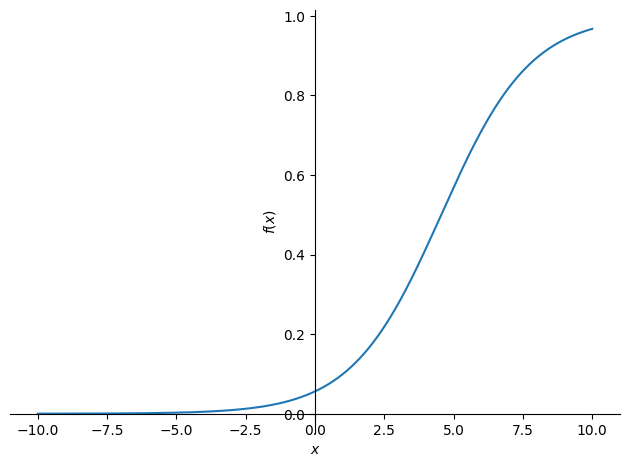

In [3]:
from sympy import *
b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0,-2.823)
p = p.subs(b1, 0.620)
print(p)

plot(p)

예제 6-3

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 데이터를 로드합니다.
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

# 페널티 없이 로지스틱 회귀를 수행합니다.
model = LogisticRegression(penalty=None)
model.fit(X, Y)

# beta1 파라미터를 출력합니다.
print(model.coef_.flatten()) # 0.69267212

# beta0 파라미터를 출력합니다.
print(model.intercept_.flatten()) # -3.17576395

[0.69268939]
[-3.17580504]


예제 6-4

In [5]:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# 결합 확률을 계산합니다.
joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    elif p.y == 0.0:
        joint_likelihood *= (1.0 - logistic_function(p.x))

print(joint_likelihood) # 4.7911180221699105e-05

4.7911180221699105e-05


예제 6-5

In [6]:
for p in patient_data:
    joint_likelihood *= logistic_function(p.x) ** p.y * \
                        (1.0 - logistic_function(p.x)) ** (1.0 - p.y)

예제 6-6

In [7]:
# 결합 확률을 계산합니다.
joint_likelihood = 0.0

for p in patient_data:
    joint_likelihood += math.log(logistic_function(p.x) ** p.y * \
                                 (1.0 - logistic_function(p.x)) ** (1.0 - p.y))

joint_likelihood = math.exp(joint_likelihood)

예제 6-7

In [8]:
from sympy import *

b, m, i, n = symbols('b m i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b + m * x(i)))))**y(i) * \
    (1.0 - (1.0 / (1.0 + exp(-(b + m * x(i))))))**(1-y(i))), (i, 0, n))

예제 6-8

In [9]:
from sympy import *
import pandas as pd

points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) \
    * (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

# b1에 대한 편도함수
d_b1 = diff(joint_likelihood, b1) \
           .subs(n, len(points) - 1).doit() \
           .replace(x, lambda i: points[i].x) \
           .replace(y, lambda i: points[i].y)

# b0에 대한 편도함수
d_b0 = diff(joint_likelihood, b0) \
           .subs(n, len(points) - 1).doit() \
           .replace(x, lambda i: points[i].x) \
           .replace(y, lambda i: points[i].y)

# 빠른 계산을 위해 lambdify() 함수로 변환합니다.
d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

# 경사 하강법을 수행합니다.
b1 = 0.01
b0 = 0.01
L = .01

for j in range(10_000):
    b1 += d_b1(b1, b0) * L
    b0 += d_b0(b1, b0) * L

print(b1, b0)

0.6926693075370812 -3.175751550409821


예제 6-9

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

# 독립 변수 열을 추출합니다.
inputs = employee_data.iloc[:, :-1]

# 종속 변수인 "did_quit" 열을 추출합니다.
output = employee_data.iloc[:, -1]

# 로지스틱 회귀 모델을 만듭니다.
fit = LogisticRegression(penalty=None).fit(inputs.to_numpy(), output)

# 모델 파라미터를 출력합니다.
print("계수: {0}".format(fit.coef_.flatten()))
print("절편: {0}".format(fit.intercept_.flatten()))

# 새로운 직언 데이터로 테스트합니다.
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "퇴사: {0}".format(probabilities)
    else:
        return "재직: {0}".format(probabilities)

# 예측하기
while True:
    n = input("직원이 떠날지 남을지 예측하기" +
              "{sex},{age},{promotions},{years employed}: ")
    if n == "":
        break
    (sex, age, promotions, years_employed) = n.split(",")
    print(predict_employee_will_stay(int(sex), int(age), int(promotions),
          int(years_employed)))

계수: [ 0.03216406  0.03683015 -2.50414078  0.97423186]
절편: [-2.73503153]
직원이 떠날지 남을지 예측하기{sex},{age},{promotions},{years employed}: 1,34,1,5
퇴사: [[0.28569689 0.71430311]]
직원이 떠날지 남을지 예측하기{sex},{age},{promotions},{years employed}: 


예제 6-10

In [11]:
from math import log, exp
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# 로그 가능도 더하기
log_likelihood_fit = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood_fit += log(logistic_function(p.x))
    elif p.y == 0.0:
        log_likelihood_fit += log(1.0 - logistic_function(p.x))

print(log_likelihood_fit)

-9.946161673231583


예제 6-11

In [12]:
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

예제 6-12

In [13]:
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",") \
     .itertuples())

likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood += log(likelihood)
    elif p.y == 0.0:
        log_likelihood += log(1.0 - likelihood)

print(log_likelihood)

-14.341070198709906


예제 6-13

In [14]:
log_likelihood = sum(log(likelihood)*p.y + log(1.0 - likelihood)*(1.0 - p.y) \
    for p in patient_data)

예제 6-14

In [15]:
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",") \
                                .itertuples())

# 훈련한 로지스틱 회귀 모델의 계수
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# 훈련 후의 로그 가능도
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

# 훈련 후의 로그 가능도
likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
    for p in patient_data)

# R2 계산
r2 = (log_likelihood - log_likelihood_fit) / log_likelihood

print(r2)

0.306456105756576


예제 6-15

In [16]:
import pandas as pd
from math import log, exp
from scipy.stats import chi2

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())

# 훈련된 로지스틱 회귀 모델의 계수
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# 훈련 후 로그 가능도 계산하기
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

# 훈련 전 로그 가능도 계산하기
likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
                     for p in patient_data)

# p 값 계산하기
chi2_input = 2 * (log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1) # 1 degree of freedom (n - 1)

print(p_value)

0.0016604875618753787


예제 6-16

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# 데이터를 로드합니다.
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

# 랜덤 시드인 random_state를 7로 설정합니다.
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)

print("정확도 평균: %.3f (표준 편차=%.3f)" % (results.mean(), results.std()))

정확도 평균: 0.611 (표준 편차=0.000)


예제 6-17

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33,
    random_state=10)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

"""
오차 행렬은 각 카테고리 내에서 정확도를 평가합니다.
[[진짜음성 거짓양성]
 [거짓음성 진짜양성]]

대각선 원소가 정확한 분류를 나타내므로 이 항목의 값이 높아야 합니다.
"""
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[6 3]
 [4 5]]


In [19]:
Y_test, prediction

(array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]))